<a href="https://colab.research.google.com/github/PriyanshChaudhary/Cats_Dogs_Classifier_color/blob/master/Dogs_%26_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
#downloading dataset using URL
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin = _URL, extract = True)

68608000/68606236 [==============================] - 1s 0us/step


In [4]:
#Unix Commmand to print all directories
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
# Specify paths into our directory structure
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))



In [7]:
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)

print('total validation cat images', num_cats_val)
print('total validation dog images', num_dogs_val)
print("--")
#print('total training images', total_train)

#print('total validation images', total_val)


total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images 500
--


In [0]:
# SETTING MODEL PARAMETERS
BATCH_SIZE = 100 #no. of train_examples we feed the model before we update the
                 #model's bias & variance(i.e. it's oarameters)
IMG_SHAPE = 150 #training data can only scan 150X150 pixels at the moment

In [0]:
# DATA PREPARATION:
# read imgaes from disk and rescale pixel values to 0 & 1
# -Generator for training data
train_image_generator = ImageDataGenerator(rescale = 1./255)
# -Generator for validation data
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = train_dir,
                                                          shuffle = True,   #shuffle so that our model doesnt start to memorize shit
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          directory = train_dir,
                                                          shuffle = False,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [0]:
#Training image visualization
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
  fig, axes =plt.subplots(1,5, figsize=(10,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
      ax.imshow(img)
  plt.tight_layout()
  plt.show()
  

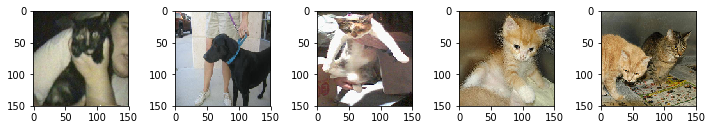

In [27]:
plotImages(sample_training_images[:5])

In [0]:
# MODEL CREATION

# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax'),
    
])

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [41]:
# train the model
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


EPOCHS = 50
history = model.fit_generator(
train_data_gen,
steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
epochs= EPOCHS,
validation_data=val_data_gen,
validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))
)

Epoch 1/50
20/20 [==============================] - 12s 602ms/step - loss: 0.3414 - acc: 0.8585 - val_loss: 0.2626 - val_acc: 0.8965
Epoch 2/50
20/20 [==============================] - 9s 467ms/step - loss: 0.3094 - acc: 0.8620 - val_loss: 0.2514 - val_acc: 0.9090
Epoch 3/50
20/20 [==============================] - 9s 467ms/step - loss: 0.2467 - acc: 0.9065 - val_loss: 0.1894 - val_acc: 0.9205
Epoch 4/50
20/20 [==============================] - 9s 469ms/step - loss: 0.1839 - acc: 0.9260 - val_loss: 0.1112 - val_acc: 0.9715
Epoch 5/50
20/20 [==============================] - 9s 475ms/step - loss: 0.1471 - acc: 0.9420 - val_loss: 0.1024 - val_acc: 0.9620
Epoch 6/50
20/20 [==============================] - 9s 466ms/step - loss: 0.0962 - acc: 0.9715 - val_loss: 0.0688 - val_acc: 0.9730
Epoch 7/50
20/20 [==============================] - 9s 462ms/step - loss: 0.0656 - acc: 0.9800 - val_loss: 0.0489 - val_acc: 0.9885
Epoch 8/50
20/20 [==============================] - 9s 465ms/step - loss: 0

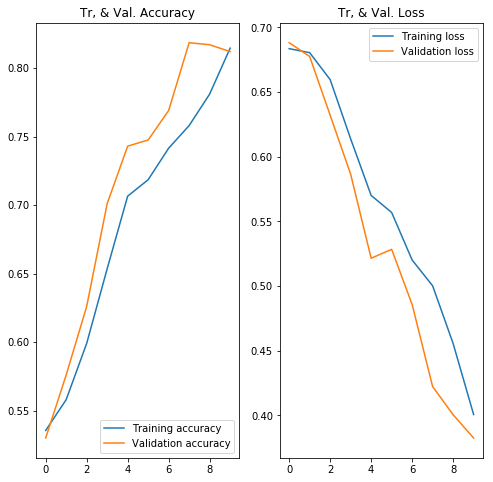

In [40]:
#overfiiting when checked with validation data since
#our model began to memorize the images
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc,label='Training accuracy')
plt.plot(epochs_range, val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Tr, & Val. Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss,label='Training loss')
plt.plot(epochs_range, val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Tr, & Val. Loss')
plt.savefig('./foo.png')
plt.show()

For no. of epochs = 10 it worked well


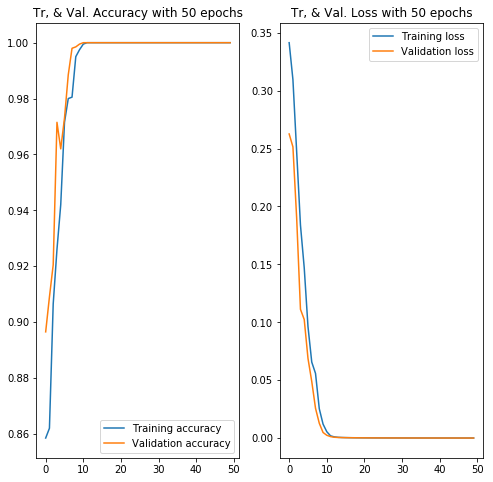

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc,label='Training accuracy')
plt.plot(epochs_range, val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Tr, & Val. Accuracy with 50 epochs')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss,label='Training loss')
plt.plot(epochs_range, val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Tr, & Val. Loss with 50 epochs')
plt.savefig('./foo.png')
plt.show()